In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd /content
# !unzip /content/drive/'My Drive'/'Colab Notebooks'/data.zip

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


In [ ]:
# from zipfile import ZipFile
# file_name="gtsrb-german-traffic-sign.zip"
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("done")

In [ ]:
#!unzip /content/gtsrb-german-traffic-sign.zip -d "/content/drive/My Drive/Colab Notebooks/Data/SignTraffic"

<font size="5">**Import library for project** </font>

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.layers import Conv2D, MaxPool2D,Dense,Dropout,Flatten
from keras.utils import to_categorical 
from keras.models import Sequential

<font size="5">**Read data**</font>

In [ ]:
size=50

In [ ]:
%cd /content/DataCNN
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            path_to_image=path+'/'+a
            image = Image.open("{}".format(path_to_image)).convert('RGB')
            image = image.resize((size,size))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

print(len(data))
print(len(labels))

/content/DataCNN
39209
39209


<font size="5">**Split data into training data and test data**</font>

In [ ]:
data=np.array(data)
labels=np.array(labels)
X_train,x_test,Y_train,y_test=train_test_split(data,labels,train_size=0.8)
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,train_size=0.75)
print(x_train.shape,x_test.shape,x_val.shape)
print(y_train.shape,y_test.shape,y_val.shape)

(23525, 50, 50, 3) (7842, 50, 50, 3) (7842, 50, 50, 3)
(23525,) (7842,) (7842,)


<font size="5">**Build one-hot coding matrix**</font>

In [ ]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)
print(y_train.shape)
print(y_test.shape)


(23525, 43)
(7842, 43)


<font size="5">**Build model CNN**</font>

In [ ]:
model=Sequential()

#convolutional block
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=x_train.shape[1:]))
#model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(None,None,3)))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())

#neural network
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
epochs=25

In [ ]:
train_history=model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=epochs)

Epoch 1/25
736/736 [==============================] - 6s 8ms/step - loss: 1.4256 - accuracy: 0.6666 - val_loss: 0.2492 - val_accuracy: 0.9361
Epoch 2/25
736/736 [==============================] - 6s 8ms/step - loss: 0.3678 - accuracy: 0.8938 - val_loss: 0.1866 - val_accuracy: 0.9637
Epoch 3/25
736/736 [==============================] - 6s 8ms/step - loss: 0.2639 - accuracy: 0.9207 - val_loss: 0.1115 - val_accuracy: 0.9721
Epoch 4/25
736/736 [==============================] - 6s 8ms/step - loss: 0.2109 - accuracy: 0.9359 - val_loss: 0.0776 - val_accuracy: 0.9793
Epoch 5/25
736/736 [==============================] - 6s 8ms/step - loss: 0.1909 - accuracy: 0.9448 - val_loss: 0.0988 - val_accuracy: 0.9760
Epoch 6/25
736/736 [==============================] - 6s 8ms/step - loss: 0.1726 - accuracy: 0.9473 - val_loss: 0.0803 - val_accuracy: 0.9773
Epoch 7/25
736/736 [==============================] - 6s 8ms/step - loss: 0.1447 - accuracy: 0.9563 - val_loss: 0.0808 - val_accuracy: 0.9781
Epoch 

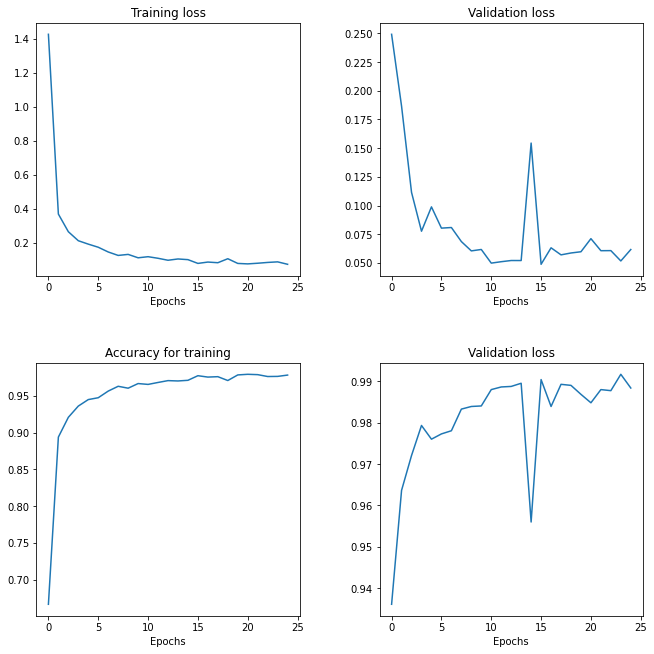

In [ ]:
fig=plt.figure(figsize=(10,10))
parameter=['loss','val_loss','accuracy','val_accuracy']
labels=['Training loss','Validation loss','Accuracy for training','Validation loss']

for i in range(len(parameter)):
  plt.subplot(2,2,i+1)
  plt.plot(np.arange(epochs),train_history.history[parameter[i]])
  plt.title(labels[i])
  plt.xlabel('Epochs')

fig.tight_layout(pad=4.0)
plt.show()

In [ ]:
%cd /content/DataCNN
import pandas as pd
table=pd.read_csv('Test.csv')
labels_test=table['ClassId'].values
path_image=table['Path'].values
table.head()

/content/DataCNN


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
print(type(labels_test))
print(type(path_image))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
data_test=[]
for path in path_image:
  image=Image.open("{}".format(path))
  image=image.resize((size,size))
  data_test.append(np.array(image))

x_test_new=np.array(data_test)
labels_predict_for_test=np.argmax(model.predict(x_test_new),axis=1)
print(labels_predict_for_test.shape)
print(labels_test.shape)


(12630,)
(12630,)


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Test:",accuracy_score(labels_predict_for_test,labels_test))


Accuracy for Test: 0.9500395882818685


In [ ]:
table_meta=pd.read_csv('Meta.csv')
labels_meta=table_meta['ClassId'].values
path_image_meta=table_meta['Path'].values
print(table_meta.shape)
print(labels_meta.shape)

(43, 5)
(43,)


In [ ]:
data_meta=[]
for path in path_image_meta:
  image=Image.open("{}".format(path)).convert('RGB')
  image=image.resize((size,size))
  data_meta.append(np.array(image))

x_meta_new=np.array(data_meta)
labels_predict_for_meta=np.argmax(model.predict(x_meta_new),axis=1)
print(labels_predict_for_meta.shape)



(43,)


In [ ]:
print("Accuracy for meta:",accuracy_score(labels_predict_for_meta,labels_meta))

Accuracy for meta: 0.4418604651162791


In [ ]:
%cd /content
model.save('SignTraffic{}.h5'.format(size))

/content
